In [1]:
%cd C:\\Users\\debie\\Documents\\anaconda_space

C:\Users\debie\Documents\anaconda_space


# Exploring eBay Car Sales Data

In this project, the dataset that will be explored contains data of used cars from the German eBay website. The aim of this project is to clean the data and analyze the included used car listings. 
The data dictionary provided with data is as follows:

    dateCrawled - When this ad was first crawled. All field-values are taken from this date.
    name - Name of the car.
    seller - Whether the seller is private or a dealer.
    offerType - The type of listing
    price - The price on the ad to sell the car.
    abtest - Whether the listing is included in an A/B test.
    vehicleType - The vehicle Type.
    yearOfRegistration - The year in which the car was first registered.
    gearbox - The transmission type.
    powerPS - The power of the car in PS.
    model - The car model name.
    kilometer - How many kilometers the car has driven.
    monthOfRegistration - The month in which the car was first registered.
    fuelType - What type of fuel the car uses.
    brand - The brand of the car.
    notRepairedDamage - If the car has a damage which is not yet repaired.
    dateCreated - The date on which the eBay listing was created.
    nrOfPictures - The number of pictures in the ad.
    postalCode - The postal code for the location of the vehicle.
    lastSeenOnline - When the crawler saw this ad last online.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
autos = pd.read_csv("autos.csv",encoding="Latin-1")
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In this dataset, there are 371 527 rows and 20 columns. From the command .info() we can see that there are 5 columns (vehicleType / gearbox / model / fuelType / notRepairedDamage) which have null content that will need to be cleaned. We can see that some of the information are in German and will need to be translated in English. Then, in the powerPS column, some of the car are marked as having 0 PS which seems to mean that there is some information missing there.

We can see that the column names use camelcase instead of snakecase, which needs to be corrected.

In [4]:
new_names = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'kilometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nb_pictures', 'postal_code',
       'last_seen']
autos.columns = new_names
autos.head(1)

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nb_pictures,postal_code,last_seen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57


We will look into the columns price and kilometer that are already numerical values.

In [5]:
autos.describe()

,price,registration_year,power_ps,kilometer,registration_month,nb_pictures,postal_code
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [6]:
print(autos["kilometer"].value_counts().sort_index())

5000        7069
10000       1949
20000       5676
30000       6041
40000       6376
50000       7615
60000       8669
70000       9773
80000      11053
90000      12523
100000     15920
125000     38067
150000    240797
Name: kilometer, dtype: int64


There doesn't seem that there is any issue with the kilometer columns. The kilometer count for each ad is already rounded.

In [7]:
print(autos["price"].value_counts(ascending=True))
print("Maximum price = ",autos["price"].max())
autos["price"].describe()

11449        1
6530         1
12973        1
19798        1
11987        1
         ...  
1200      4594
1000      4649
1500      5394
500       5670
0        10778
Name: price, Length: 5597, dtype: int64
Maximum price =  2147483647


count    3.715280e+05
mean     1.729514e+04
std      3.587954e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64

The prices values are a lot more diversified. We can see that the price that is the more observed is 0. It might mean that there are ad with the aim of getting rid off useless or old cars (which might be too expensive to repair for example).

The maximum price seems to be an error because it is around 2 billion euros which is not possible. Let's investigate and correct the high prices.

In [8]:
autos["price"].value_counts().sort_index(ascending=False).head(20)

2147483647     1
99999999      15
99000000       1
74185296       1
32545461       1
27322222       1
14000500       1
12345678       9
11111111      10
10010011       1
10000000       8
9999999        3
3895000        1
3890000        1
2995000        1
2795000        1
1600000        2
1300000        1
1250000        2
1234566        1
Name: price, dtype: int64

After looking into the real eBay website, it seems that the car's prices doesn't goe over 400 000 €. As a result, we'll remove any row with a price value over 400 000 €.

In [9]:
autos = autos[autos["price"]<400000]
autos["price"].describe()

count    371419.000000
mean       5733.580021
std        8922.004192
min           0.000000
25%        1150.000000
50%        2950.000000
75%        7200.000000
max      399997.000000
Name: price, dtype: float64

In [10]:
autos["price"].value_counts().sort_index(ascending=False).head(20)

399997    1
395000    1
390000    1
370000    2
368000    1
350000    4
349000    1
345000    1
323223    1
300000    1
299000    3
295000    1
294900    1
285000    1
284000    1
279000    1
275000    1
270000    1
265000    1
260000    3
Name: price, dtype: int64

The price are now cleaned of absurd values.

We got 3 column in the form of a date: date_crawled, ad_created and last_seen. All of these columns are too much precise as they contain the hour. Let's remove so that only the day, month and year are left and analyze the result.

In [25]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356680 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        356680 non-null  object
 1   name                356680 non-null  object
 2   seller              356680 non-null  object
 3   offer_type          356680 non-null  object
 4   price               356680 non-null  int64 
 5   abtest              356680 non-null  object
 6   vehicle_type        333562 non-null  object
 7   registration_year   356680 non-null  int64 
 8   gearbox             338448 non-null  object
 9   power_ps            356680 non-null  int64 
 10  model               338339 non-null  object
 11  kilometer           356680 non-null  int64 
 12  registration_month  356680 non-null  int64 
 13  fuel_type           329048 non-null  object
 14  brand               356680 non-null  object
 15  unrepaired_damage   291056 non-null  object
 16  ad

In [11]:
date_crawled=autos["date_crawled"].str[:10]
ad_created=autos["ad_created"].str[:10]
last_seen=autos["last_seen"].str[:10]

In [27]:
date_crawled.value_counts(normalize=True,dropna=False).sort_index()

2016-03-05    0.025551
2016-03-06    0.014463
2016-03-07    0.035698
2016-03-08    0.033450
2016-03-09    0.034212
2016-03-10    0.032567
2016-03-11    0.032723
2016-03-12    0.036194
2016-03-13    0.015740
2016-03-14    0.036269
2016-03-15    0.033455
2016-03-16    0.030155
2016-03-17    0.031660
2016-03-18    0.013125
2016-03-19    0.035294
2016-03-20    0.036352
2016-03-21    0.035725
2016-03-22    0.032470
2016-03-23    0.031975
2016-03-24    0.029915
2016-03-25    0.032936
2016-03-26    0.031967
2016-03-27    0.030273
2016-03-28    0.035117
2016-03-29    0.034169
2016-03-30    0.033534
2016-03-31    0.031880
2016-04-01    0.034107
2016-04-02    0.035079
2016-04-03    0.038727
2016-04-04    0.037615
2016-04-05    0.012821
2016-04-06    0.003164
2016-04-07    0.001618
Name: date_crawled, dtype: float64

It seems that all of these pages were all crawled for the first time around the same date: during March and April 2016.

In [31]:
ad_created.str[:7].value_counts(dropna=False).sort_index()#.plot()

2014-03         1
2015-03         1
2015-06         2
2015-08         2
2015-09         3
2015-10         1
2015-11        10
2015-12        10
2016-01        76
2016-02       420
2016-03    310750
2016-04     60143
Name: ad_created, dtype: int64

Almost all of these ads were created during March and April 2016.

In [32]:
last_seen.value_counts(normalize=True,dropna=False).sort_index()

2016-03-05    0.001290
2016-03-06    0.004135
2016-03-07    0.005264
2016-03-08    0.008053
2016-03-09    0.009994
2016-03-10    0.011564
2016-03-11    0.013047
2016-03-12    0.023399
2016-03-13    0.008492
2016-03-14    0.012299
2016-03-15    0.016410
2016-03-16    0.016424
2016-03-17    0.028757
2016-03-18    0.006925
2016-03-19    0.016313
2016-03-20    0.019905
2016-03-21    0.020131
2016-03-22    0.020607
2016-03-23    0.018149
2016-03-24    0.019237
2016-03-25    0.019097
2016-03-26    0.016162
2016-03-27    0.016911
2016-03-28    0.022271
2016-03-29    0.023311
2016-03-30    0.023857
2016-03-31    0.024242
2016-04-01    0.024019
2016-04-02    0.025004
2016-04-03    0.025354
2016-04-04    0.025661
2016-04-05    0.126208
2016-04-06    0.217843
2016-04-07    0.129665
Name: last_seen, dtype: float64

The last time the crawler saw these ads is almost the same as the first time it saw them.

Let's look into the year of registration of each car.

In [15]:
autos["registration_year"].describe()

count    371419.000000
mean       2004.561043
std          91.936956
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: registration_year, dtype: float64

We can see here that there are some incorrect data as the minimum year of registration in 1000 and the maximum one is 9999.
Since the data is from 2016, let's consider the validate year of registration as between 1900 and 2016.

<AxesSubplot:ylabel='Frequency'>

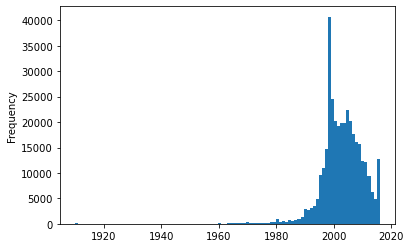

In [42]:
autos = autos[autos["registration_year"].between(1900,2016)]
autos["registration_year"].plot.hist(bins = 100)

Most of the year of registration of the car which are being sold are between the end of the 90s and the start of the 2010s.

Now we want to see which brand are being sold the most.

In [46]:
top20_brand = autos["brand"].value_counts(normalize=True).head(20)
top20_brand

volkswagen        0.212392
bmw               0.109698
opel              0.107090
mercedes_benz     0.095966
audi              0.089355
ford              0.068854
renault           0.047572
peugeot           0.029867
fiat              0.025763
seat              0.018636
skoda             0.015412
mazda             0.015350
smart             0.014108
citroen           0.013875
nissan            0.013572
toyota            0.012751
sonstige_autos    0.010589
hyundai           0.009832
mini              0.009213
volvo             0.009131
Name: brand, dtype: float64

Above we have the top 20of the vehicle brand which are being sold the most in the dataset.

Let's take interest into the 6 top brands : Volkswagen, BMW, Opel, Mercedes, Audi and Ford. We will look into their price and their mileage.

In [48]:
top6=top20_brand.head(6)
d_price={}
d_mileage={}
for b in top6.index:
    d_price[b]=autos["price"][autos["brand"]==b].mean()
    d_mileage[b]=autos["kilometer"][autos["brand"]==b].mean()
print(d_price)
print(d_mileage)

{'volkswagen': 5231.3883124769, 'bmw': 8234.726710455696, 'opel': 2870.0537738565854, 'mercedes_benz': 8398.008881357913, 'audi': 8849.650309058392, 'ford': 3595.8644488782115}
{'volkswagen': 128338.01943080415, 'bmw': 132663.37822986685, 'opel': 128756.83954237244, 'mercedes_benz': 130582.25481317012, 'audi': 129498.44686392018, 'ford': 123617.81831507798}


In [60]:
price_series=pd.Series(d_price)
mileage_series=pd.Series(d_mileage)
top_brand = pd.DataFrame(price_series, columns = ['price'])
top_brand['mileage'] = mileage_series
top_brand

,price,mileage
volkswagen,5231.388312,128338.019431
bmw,8234.726710,132663.378230
opel,2870.053774,128756.839542
mercedes_benz,8398.008881,130582.254813
audi,8849.650309,129498.446864
ford,3595.864449,123617.818315
